# Introduction

Notebook to test the implementation of mini-patching related functionality

In [1]:
import tensorflow as tf
import tenfem
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


In [2]:
mesh = tenfem.mesh.examples.star(0.2)
element = tenfem.reference_elements.TriangleElement(1)

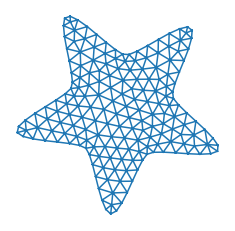

In [3]:
fig, ax = plt.subplots()
ax.triplot(mesh._triang)
ax.set_aspect('equal'); ax.axis('off')
plt.show()

In [4]:
submesh_provider = tenfem.layers.TaperedSubmeshProvider(mesh, element, 0.5)
submesh_provider._build_tapered_neighbors()
submesh_provider._build_mesh_neighborhood()

In [9]:
mesh_tensor_repr = submesh_provider(1.)
smesh = tenfem.mesh.utils.mesh_from_tensor_repr(mesh_tensor_repr, element)
smesh.add_matplotlib_tri()

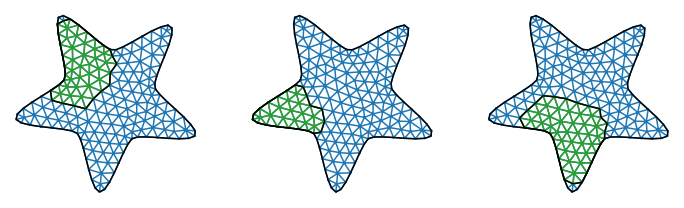

In [17]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

for i, ax in enumerate(axes):

    mesh_tensor_repr = submesh_provider(1.)
    smesh = tenfem.mesh.utils.mesh_from_tensor_repr(mesh_tensor_repr, element)
    smesh.add_matplotlib_tri()
    nodes, elems, node_t, bnd_elems = mesh_tensor_repr

    ax.triplot(mesh._triang)
    ax.set_aspect('equal'); ax.axis('off')
    ax.triplot(smesh._triang)
    ax.add_collection(
        LineCollection(tf.gather(nodes, bnd_elems), colors='k'))
    ax.add_collection(
        LineCollection(tf.gather(mesh.nodes, mesh.boundary_elements), colors='k'))

    
plt.show()

## Solving the model on a restricted domaiN

In [19]:
from tenfem.layers import AssembleStiffnessMatrix
stiffness_matrix = AssembleStiffnessMatrix(lambda x: tf.ones_like(x)[..., 0],
                                           reference_element=submesh_provider.reference_element)(mesh.get_tensor_repr())

In [23]:
submesh_provider = tenfem.layers.TaperedSubmeshProvider(mesh, element, 0.5, return_precond_matrix=True)
submesh_provider._build_tapered_neighbors()
submesh_provider._build_mesh_neighborhood()

TypeError: __init__() got an unexpected keyword argument 'return_precond_matrix'